# Drive mount to get the data for the model (Images)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/"
#!ls

/content/drive/MyDrive


# Import relevant libraries for generating and viewing data for the model

Additionally create the routes to the main directory and the train and test directories.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'Hongos'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

Give parameters for the image data generator according to the characteristics wanted for the model.

In [5]:
train_datagen = ImageDataGenerator(
  rescale = 1./255,
  rotation_range = 20,
  width_shift_range = 0.2,
  height_shift_range = 0.2,
  shear_range = 0.2,
  zoom_range = 0.2,
  horizontal_flip = True
)

Give information about the images for the generator (classes, route, size, class mode, etc.)

In [6]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size = (150, 150),
  batch_size = 8,
  classes=['edible mushroom sporocap', 'edible sporocap', 'poisonous mushroom sporocap', 'poisonous sporocap'],
  class_mode ='categorical',
  #follow_links=True
)

Found 3066 images belonging to 4 classes.


Plot some generated images to check if it is working correctly

<Figure size 640x480 with 0 Axes>

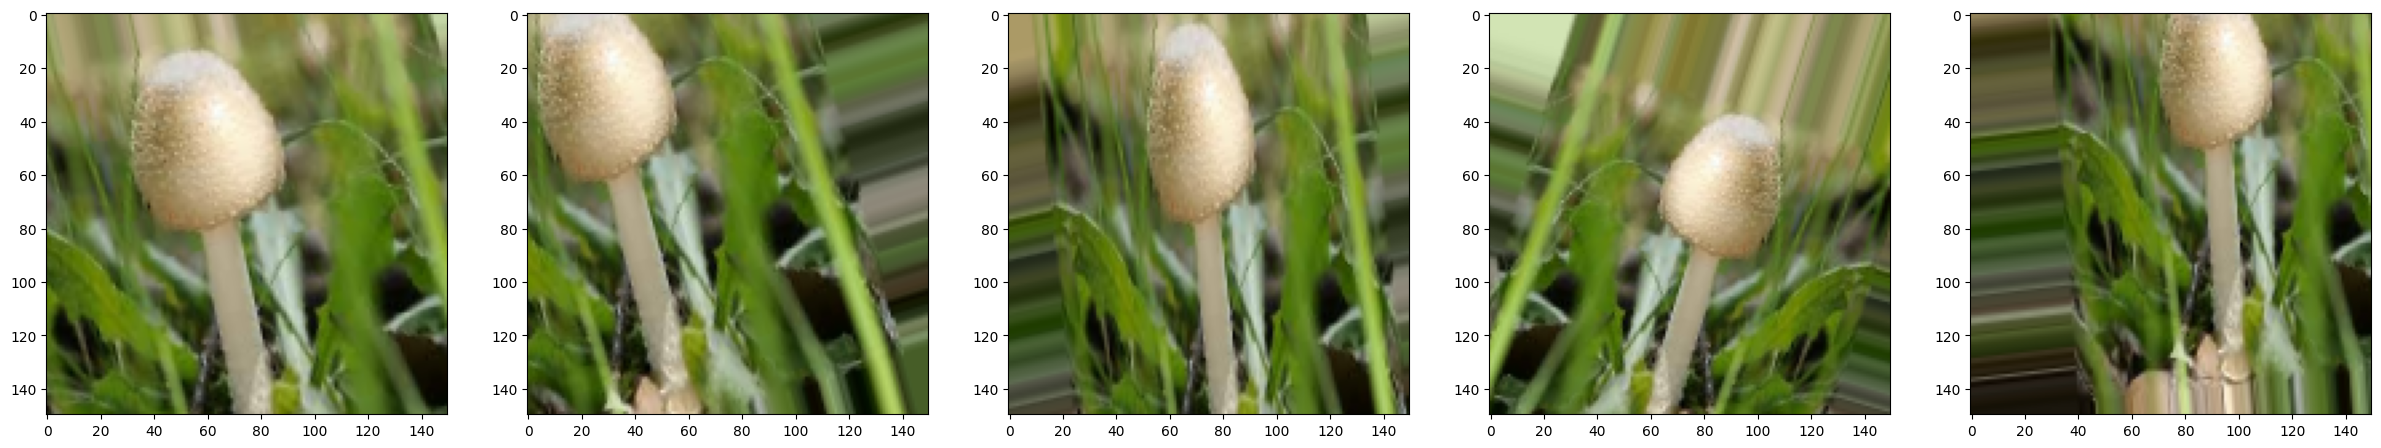

In [7]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

In [8]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['edible mushroom sporocap', 'edible sporocap', 'poisonous mushroom sporocap', 'poisonous sporocap']


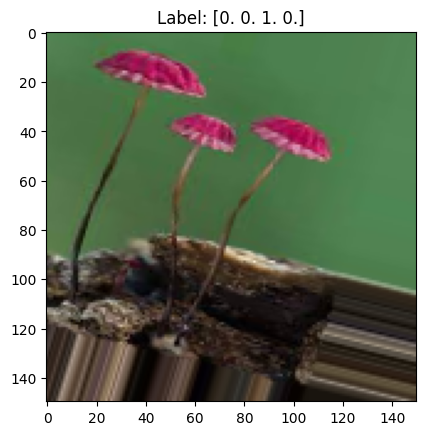

In [9]:
images, labels = next(train_generator)

plt.imshow(images[0])
plt.title(f"Label: {labels[0]}")
plt.show()

# Import relevant libraries for training the model

In [10]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

Establish the configuration for the model (Conv2D, input shape, number of layers, activation, etc.)

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), activation="relu", input_shape = (150,150, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 1)         │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21904)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       5,607,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,871,648 (22.40 MB)

 Trainable params: 5,871,648 (22.40 MB)

 Non-trainable params: 0 (0.00 B)

Compile the model and train it using the shuffled generated images

In [13]:
model.compile(loss='categorical_crossentropy',
						optimizer=optimizers.Adam(learning_rate=2e-5),
						metrics=['acc'])

In [14]:
history = model.fit(
					train_generator,
          epochs = 10,
          shuffle = True
     )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 1053s 3s/step - acc: 0.3552 - loss: 1.3692
Epoch 2/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 35s 92ms/step - acc: 0.4040 - loss: 1.3267
Epoch 3/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 35s 91ms/step - acc: 0.3963 - loss: 1.3264
Epoch 4/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 36s 94ms/step - acc: 0.3882 - loss: 1.3388
Epoch 5/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 35s 92ms/step - acc: 0.3847 - loss: 1.3394
Epoch 6/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - acc: 0.3986 - loss: 1.3263
Epoch 7/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 35s 92ms/step - acc: 0.4283 - loss: 1.3154
Epoch 8/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - acc: 0.4163 - loss: 1.3175
Epoch 9/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 35s 91ms/step - acc: 0.4226 - loss: 1.3051
Epoch 10/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - acc: 0.4369 - loss: 1.2916


Test the model accuracy using generated test images

In [15]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 8,
					class_mode= 'categorical')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)

Found 345 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.4172 - loss: 75.1484

test acc :
 0.4050000011920929
